# Expectation maximization

This notebook contains...

## Setup

In [6]:
# Check if running in Google Colab and install dependencies
# If running locally, this will just print a message
import sys

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("Installing dependencies from requirements.txt...")
    !pip install -r https://raw.githubusercontent.com/garyuppal/blog-code/refs/heads/main/expectation_maximization/requirements.txt
else:
    print("Running locally...")

Running locally...


In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [12]:
# change font to arial for figures
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['svg.fonttype'] = 'none'

In [13]:
# set random seed for reproducibility
np.random.seed(42)

In [14]:
# Create output directory if it doesn't exist
outpath = Path("output")
outpath.mkdir(parents=True, exist_ok=True)

## Load and visualize data

In [4]:
data = pd.read_csv("faithful.csv")

In [7]:
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [10]:
fontsize = 14
lgd_fontsize = 12

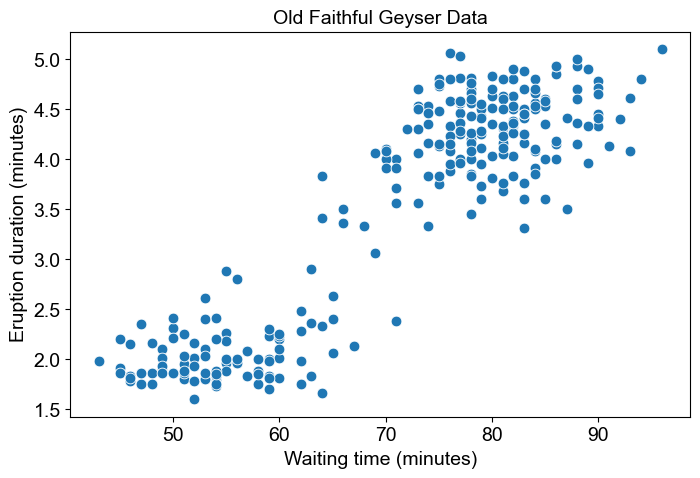

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
ax=sns.scatterplot(data=data, x="waiting", y="eruptions", ax=ax, s=60)
ax.set_xlabel("Waiting time (minutes)", fontsize=fontsize)
ax.set_ylabel("Eruption duration (minutes)", fontsize=fontsize)
ax.set_title("Old Faithful Geyser Data", fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
plt.savefig(outpath / "faithful_data.svg", bbox_inches='tight')

## Implement EM algorithm

## Fit data with GMM and visualize